In [2]:
# SIR Model
# Susceptible - Individual is prone to infection
# Infected - Individual contracted disease
# Recovered - Individual survived

In [1]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
df = pd.read_csv('covid-time-data-2.csv')
df_sorted = df.sort_values(by=['Confirmed'],ascending=True)

In [3]:
# USA
USA = df_sorted[df_sorted["Country/Region"] == "US"].reset_index()
# Italy
Italy = df_sorted[df_sorted["Country/Region"] == "Italy"].reset_index()
# Germany
Germany = df_sorted[df_sorted["Country/Region"] == "Germany"].reset_index()
# China
China = df_sorted[df_sorted["Country/Region"] == "China"].reset_index()
# Spain
Spain = df_sorted[df_sorted["Country/Region"] == "Spain"].reset_index()

In [4]:
# i is infection rate
# r is recovery rate

/Users/zacblac/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/zacblac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/zacblac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


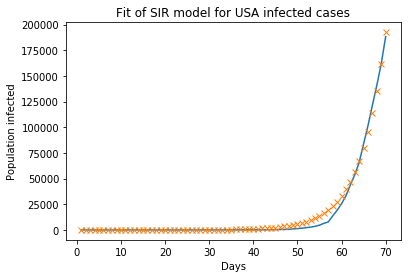

Optimal parameters: infection rate = -0.0018713074029189205 recovery rate =  -0.1782145877826112


In [5]:
# USA Analysis

from scipy import optimize,integrate
from scipy.integrate import odeint

population = float(327000000)
confirmed = list(USA['Confirmed'])
day_count = list(range(1,len(USA['Date'])+1))

ydata = np.array([i for i in confirmed], dtype=float)
xdata = np.array(day_count, dtype=float)
N = population
infected1 = ydata[0]
sus1 = N - infected1
rec1 = 0.0

def sir_model(y,x,infection_rate,recovery_rate):
    sus = -infection_rate * y[0] * y[1] / N
    rec = recovery_rate * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_model(x,infection_rate,recovery_rate):
    return odeint(sir_model, (sus1, infected1, rec1), x, args=(infection_rate, recovery_rate))[:,1]

a,b = optimize.curve_fit(fit_model,xdata,ydata)
fitted = fit_model(xdata,*a)


plt.plot(xdata, ydata)
plt.plot(xdata, fitted,'x')

plt.title("Fit of SIR model for USA infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: infection rate =", a[0], "recovery rate = ", a[1])